<a href="https://colab.research.google.com/github/dongrepranali/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YES BANK STOCK CLOSING PRICE PREDICTION - SUPERVISED ML REGRESSION**

**PROBLEM STATEMENT**

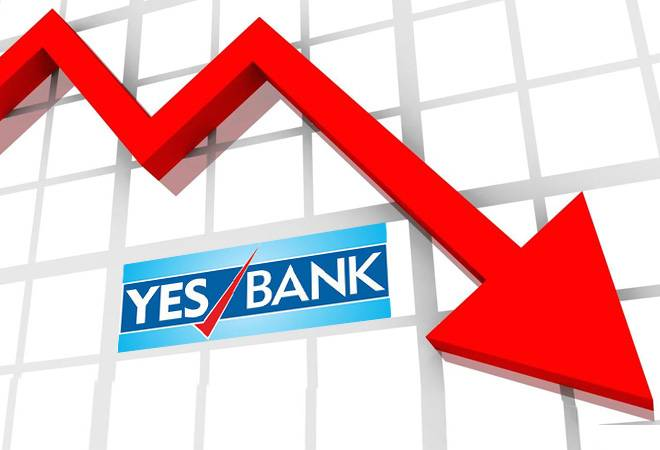

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month

**Let's Get to know what is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

**"Trying to know our data because if you know your data then only you can implent your ideas and get insights from it"**
We understood our problem and what our objective is, in order to predict the stock's closing price of the month there are few things that'll be required or you can say that (mandatory) to perform regression analysis or building a better model which can easily and accurately predict our desired output.

So, to build a well performing model, we have divided our task into several steps:

**Feature Engineering:-** Introducing New Variables, Dummy Variables

**Univariate Analysis:-** Distplot, Histogram, Barplot

**Bivariate Analysis:-** Boxplot, Heatmap,

**Introduced Models:-** Linear Regression, Lasso, Ridge, ElasticNet and XGBoost Regression

Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.


In [34]:
# importing the required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import math

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from scipy.stats import zscore

**Importing and Loading data**

In [36]:
# Mounting the Drive first
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Loading and reading the dataset
df = pd.read_csv("/content/drive/My Drive/csv file caps2/data_YesBank_StockPrices.csv")

In [38]:
#Checking the head and tail of the data
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [39]:
df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**Data Exploration**

In [40]:
# brief summary of the dataset
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [41]:
# details of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [42]:
df.shape

(185, 5)

In [43]:
list(df.columns)

['Date', 'Open', 'High', 'Low', 'Close']

* We have 5 columns and 185 rows in the dataset
* No null values
* Date column is of 'object' datatype we have to convert it to 'datetime'.

In [44]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


**Checking for Null values and Outliers**

In [46]:
# Checking Null Values
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [47]:
#Looking for duplicates in dataset

len(df[df.duplicated()])

0

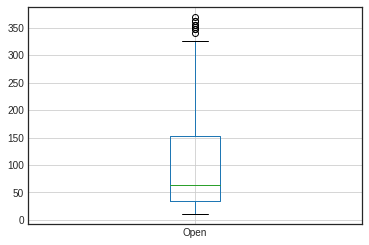

In [48]:
df.boxplot('Open')

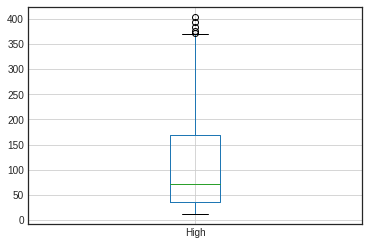

In [15]:
df.boxplot('High')

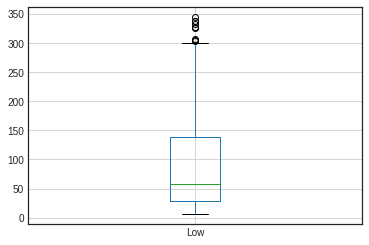

In [16]:
df.boxplot('Low')

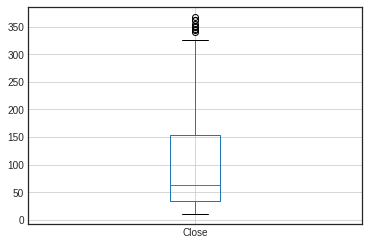

In [17]:
df.boxplot('Close')

Data preprocessing finished. Dataset is clean and ready for exploratory data analysis

**Exploratory Data Analysis**

**Visualising the data**

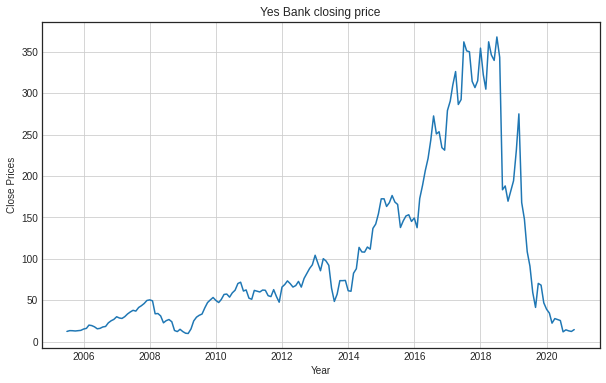

In [18]:
#plotting close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close Prices')
plt.plot(df['Date'], df['Close'])
plt.title('Yes Bank closing price')
plt.show()

This plot of Closing prices of different dates give a very vivid picture of fluctuation in prices regarding different time-duration. After 2018 there is sudden fall in the stock closing price. It makes sense how severly Rana Kapoor case fraud affected the price of Yes bank stocks.

Closing price of stock price is always important so i take close price as dependent variable

**UNIVARIATE ANALYSIS**



**Dependent variable [close price of stock]**

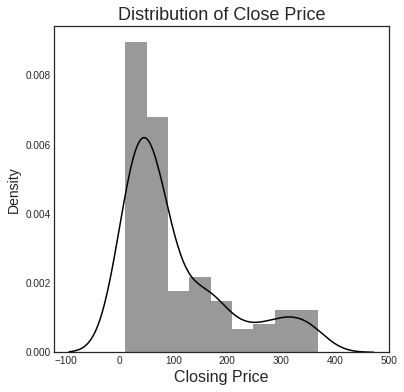

In [19]:
#Checking the distribution of our dependent variable 

plt.figure(figsize = (6,6))
sns.distplot(df['Close'], color = 'Black')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

The distribution of Stock Closing Price is rightly skewed distribution

To make it normal distribution apply Log Transformation

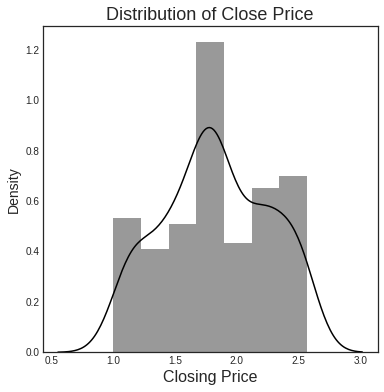

In [20]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Close']), color = 'Black')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

After log transformation, distribution of closing price is more normal

**Independent Variable [Open , High and Low price of stock]**

Plotting distribution for numerical Features

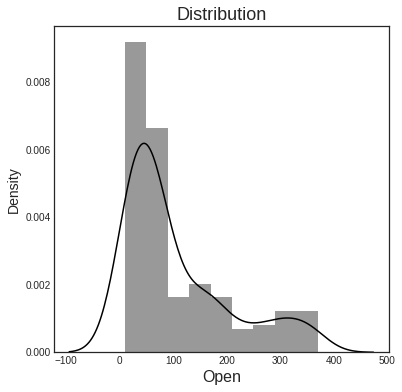

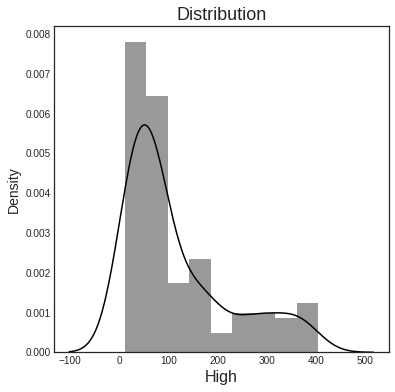

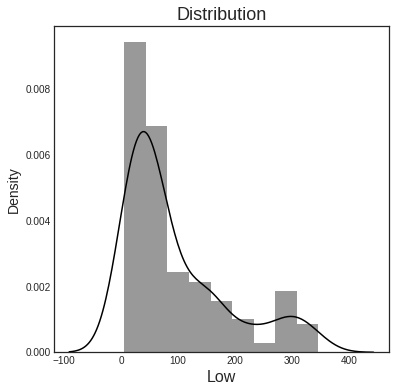

In [21]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Open'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['High'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(df['Low'], color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks numerical features are rightly skewed.

Apply log transformation to make normal.

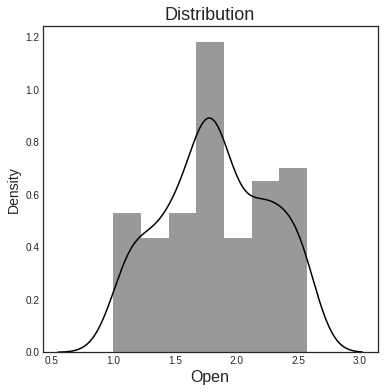

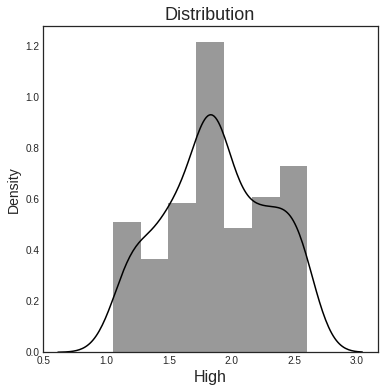

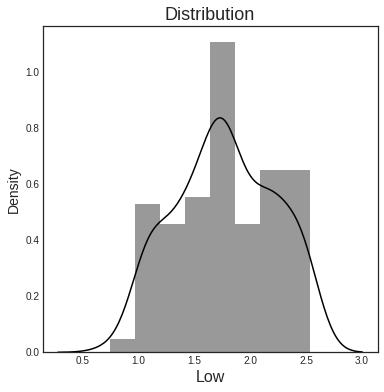

In [22]:
# Log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Open']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['High']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

# Log Transformation of 'low' feature 
plt.figure(figsize = (6,6))
sns.distplot(np.log10(df['Low']), color = 'Black')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

**BIVARIATE ANALYSIS**

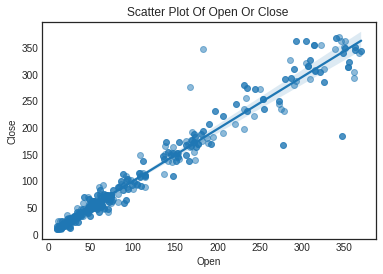

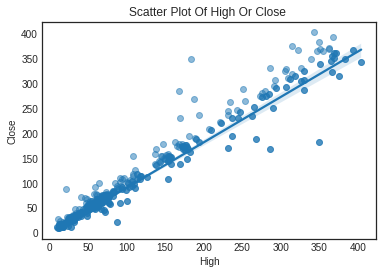

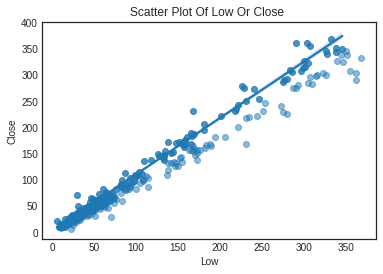

In [23]:
# scatter plot to see the relationship between dependent & independent variables

plt.scatter(df['Close'], df['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= df)
plt.show()

plt.scatter(df['Close'], df['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= df)
plt.show()

plt.scatter(df['Close'], df['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= df)
plt.show()

**Finding Correlation Between Variables**

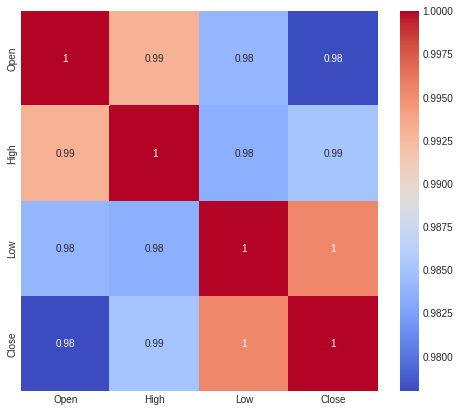

In [24]:
# Correaltion Between the Variables
corr = df.corr()
plt.figure(figsize = (8,7))
sns.heatmap(abs(corr),annot = True,cmap = 'coolwarm')

There are very high correlation between independent variables which lead us to multicollinearity. High multicollinearity is not good for fitting model and prediction because a slight change in any independent variable will give very unpredictable results.

To check multicollinearity and how much it is in our dataset, we have to calculate VIF(Variation Inflation Factor)



In [25]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(data):
  vif = pd.DataFrame()
  vif['Variables'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return (vif)

In [26]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Close']]])

,Variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important.

Before deleting any variable again we have to plot heatmap between independet variables and dependent variable to decide which variable we can drop

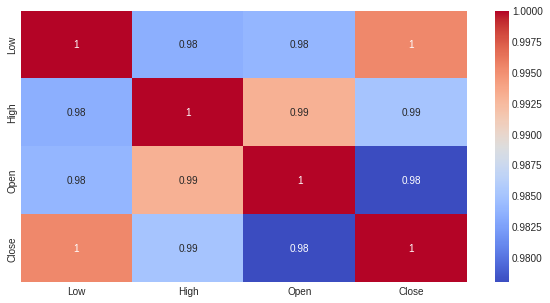

In [27]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['Low','High','Open','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

Now,drop Open feature from the VIF matrix.

We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [28]:
# Here we will drop the open feature from the VIF matrix
calc_vif(df[[i for i in df.describe().columns if i not in ['Date', 'Close','Open']]])

,Variables,VIF
0,High,62.598129
1,Low,62.598129


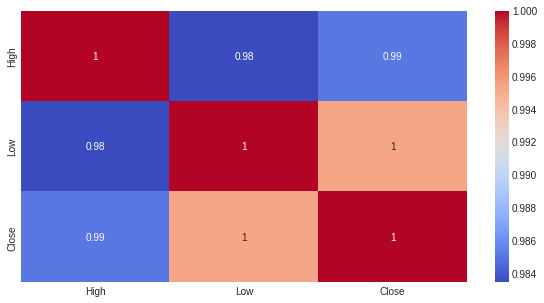

In [29]:
#heatmap for correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['High','Low','Close']].corr(), annot = True, cmap='coolwarm')
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

**Splitting data in Train and Test**

Splitting of Data

X = Independent Variable

y = Dependent Variable

In [49]:
# Splitting data into Dependent and Independent Variables

X = df.drop(columns=['Close','Date'])
y = df['Close']

In [50]:
# Transformation of data
X = X.apply(zscore)
y = np.log10(y)

In [51]:
# splitting the dataset into the training set and test set with 80-20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)      # Shape of the Training dataset
print(X_test.shape)       # Shape of the Test dataset

(148, 3)
(37, 3)


In [52]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

we will build 5 regression models for our data.
**Linear Regression** - Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.
**Lasso Rigression** - Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).
**Ridge Rigression** - Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.
**Elastic Net Regression** - Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.
**XG Boost Regrression** - XGBoost is a powerful approach for building supervised regression models. The validity of this statement can be inferred by knowing about its (XGBoost) objective function and base learners. The objective function contains loss function and a regularization term. It tells about the difference between actual values and predicted values, i.e how far the model results are from the real values.

**Linear Regression**

In [53]:
# fit data into linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [54]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train),4)

0.8147

**Prediction**

In [55]:
#Predict y_test on the basis of train sets
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [56]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [57]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [58]:
test_Dataset['Predicted Closing Price']= y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,1.403464,1.517387
179,1.408240,1.532118
66,1.720903,1.635190
40,1.088490,1.475394
166,2.170115,2.014715


**Evaluation Matrices**

In [59]:
# Test Performance of Linear Regregression
print("Mean Squared Error :", round(mean_squared_error(y_test, y_pred), 4))
print("Root Mean Squared Error :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("Mean Absolute Error :", round(mean_absolute_error(y_test, y_pred), 4))
print("Mean Absolute Percentage Error :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 :", round(r2_score(y_test, y_pred),4))

Mean Squared Error : 0.0316
Root Mean Squared Error : 0.1777
Mean Absolute Error : 0.1513
Mean Absolute Percentage Error : 0.0954
r2 : 0.8226


Text(0, 0.5, 'Predicted test value')

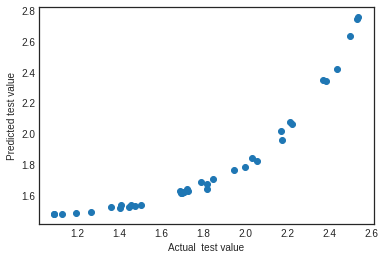

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

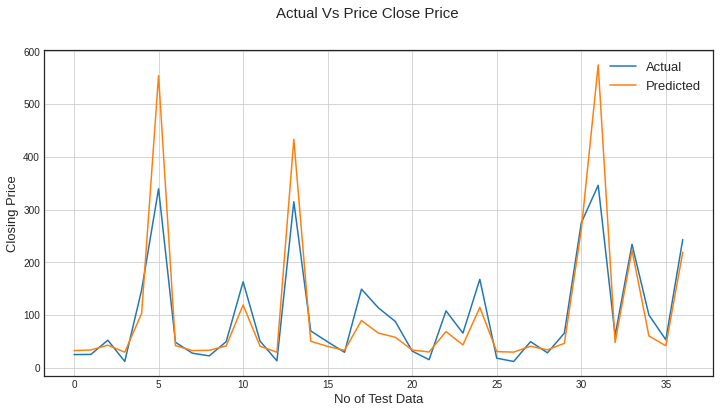

In [61]:
# Actual vs predicted price for Linear Regression 
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Price Close Price', fontsize =15)
plt.legend(['Actual', 'Predicted'], fontsize = 13)
plt.xlabel('No of Test Data', fontsize= 13)
plt.ylabel('Closing Price', fontsize= 13)
plt.grid()

**Lasso Regression**

In [62]:
# fit data into lasso regression
lasso = Lasso(alpha=0.005, max_iter = 3000)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

**Prediction**

In [63]:
# prediction of train data
y_pred_lasso = lasso.predict(X_test)

In [64]:
y_pred_lasso

array([1.53168982, 1.54626433, 1.64772636, 1.49274256, 2.00936688,
       2.70568011, 1.64049984, 1.53226521, 1.54014459, 1.63199019,
       2.06835968, 1.62551073, 1.49038208, 2.59859084, 1.71090087,
       1.62196586, 1.53924848, 1.95160324, 1.81420729, 1.76583684,
       1.54650943, 1.49845368, 1.83941542, 1.64493997, 2.04922943,
       1.50676826, 1.49408116, 1.62334947, 1.5500453 , 1.67959931,
       2.38074349, 2.72386965, 1.69275547, 2.33070315, 1.78213011,
       1.63392977, 2.31195507])

In [65]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Matrices**

In [66]:
# Test Performance of lasso regression

print("Mean Squared Error :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("Root Mean Squared Error :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("Mean Absolute Error :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("Mean Absolute Percentage Error :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

Mean Squared Error : 0.0326
Root Mean Squared Error : 0.1806
Mean Absolute Error : 0.1535
Mean Absolute Percentage Error : 0.0978
R2 : 0.8168


Text(0, 0.5, 'Predicted Value')

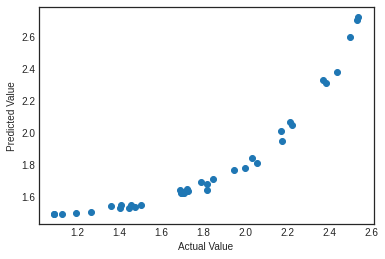

In [67]:
plt.scatter((y_test), (y_pred_lasso))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

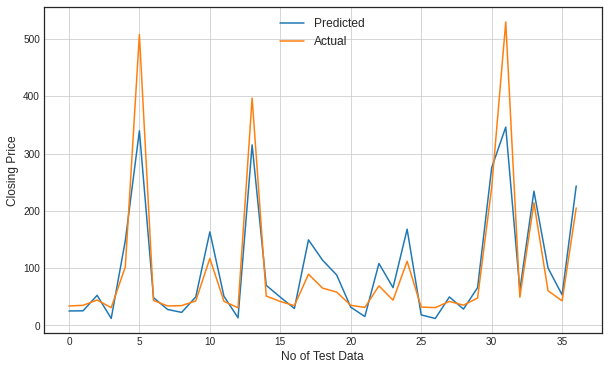

In [68]:
# Actual vs predicted price for lasso regression
plt.figure(figsize= (10,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Predicted', 'Actual'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid()

Cross-Validation :-It is a resampling procedure used to evaluate machine learning models on a limited data sample. Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.

**Cross Validation and Hyperparameter Tuning of Lasso**

In [69]:
# Hyper parameter Tuning For Lasso
lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.001
 The negative mean squared error is :  -0.0352


**Prediction**

In [71]:
# Prediction of test data .
y_pred_lasso1 = lasso_regressor.predict(X_test)
y_pred_lasso1

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [72]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Matrices**

In [73]:
# Test performance after validation
print("Mean Squared Error :", round(mean_squared_error(y_test, y_pred_lasso1), 4))
print("Root Mean Squared Error :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso1)), 4))
print("Mean Absolute Error :", round(mean_absolute_error(y_test, y_pred_lasso1), 4))
print("Mean Absolute Percentage Error :",round(mean_absolute_percentage_error(y_test, y_pred_lasso1), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso1), 4))

Mean Squared Error : 0.032
Root Mean Squared Error : 0.1789
Mean Absolute Error : 0.1522
Mean Absolute Percentage Error : 0.0961
R2 : 0.8202


Text(0, 0.5, 'Predicted Value')

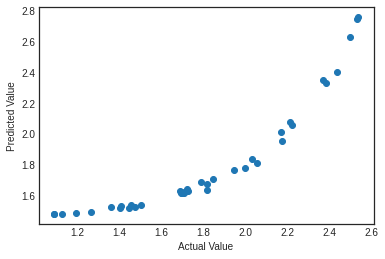

In [74]:
plt.scatter((y_test),(y_pred_lasso1))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

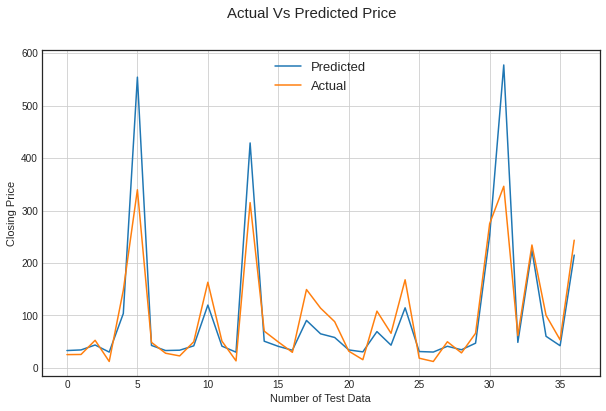

In [75]:
# Actual Vs Predicted Price after validation
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_lasso1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Price', fontsize= 15)
plt.legend(["Predicted","Actual"], fontsize=13)
plt.xlabel('Number of Test Data', fontsize =11)
plt.ylabel('Closing Price', fontsize =11)
plt.grid()

**Ridge Regression**

In [76]:
# fit data into ridge regression
ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [77]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 4)

0.8141

**Prediction**

In [78]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51681675, 1.53255024, 1.64135134, 1.47687218, 2.01963705,
       2.75155235, 1.63473225, 1.51693004, 1.52773879, 1.62318793,
       2.08158597, 1.61542024, 1.47455115, 2.63508426, 1.70593368,
       1.61278434, 1.52495118, 1.95973505, 1.80785023, 1.76121244,
       1.53334058, 1.48368101, 1.84037593, 1.6326748 , 2.05955474,
       1.49175569, 1.47829991, 1.6125058 , 1.53709372, 1.67458833,
       2.39845583, 2.77299789, 1.68838401, 2.35904715, 1.77719596,
       1.62440651, 2.33055613])

In [79]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Matrices**

In [80]:
# Test Performance of ridge regression
print("Mean Squared Error :", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("Root Mean Squared Error :", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("Mean Absolute Error :", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("Mean Absolute Percentage Error :", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge), 4))

Mean Squared Error : 0.0321
Root Mean Squared Error : 0.1791
Mean Absolute Error : 0.1522
Mean Absolute Percentage Error : 0.0959
R2 : 0.8197


Text(0, 0.5, 'Predicted Value')

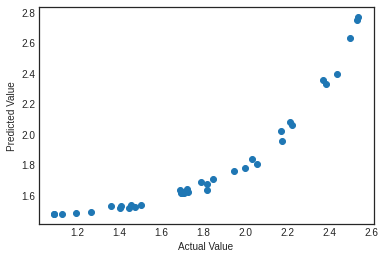

In [81]:
plt.scatter((y_test),(y_pred_ridge))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

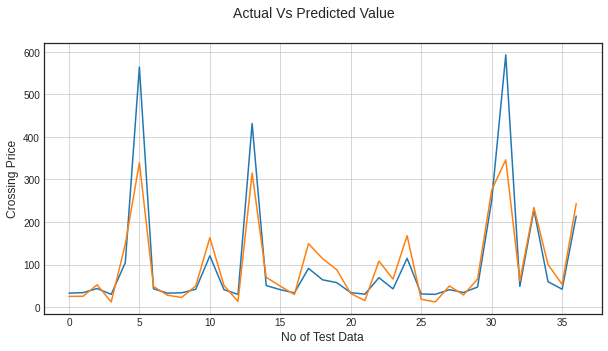

In [82]:
# Actual Vs Predicted Price for ridge regression
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Value', fontsize= 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Crossing Price', fontsize= 12)
plt.grid()

**Cross Validation and Hyperparameter Tuning of Ridge**

In [83]:
# Hyperparameter tuning of Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [84]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [85]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 1
 The negative mean squared error for is : -0.035


**Prediction**

In [86]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1

array([1.52363934, 1.53950359, 1.65147831, 1.48676803, 2.02341628,
       2.7257897 , 1.65011276, 1.52368738, 1.53901778, 1.62976844,
       2.07741879, 1.61843866, 1.48318818, 2.60390027, 1.70828562,
       1.61948309, 1.53219564, 1.96060489, 1.80076803, 1.75906672,
       1.54190217, 1.49450483, 1.83932752, 1.63349981, 2.05019403,
       1.50013616, 1.48828434, 1.61559809, 1.54485816, 1.68242956,
       2.36963964, 2.75593021, 1.69685984, 2.35505327, 1.77352279,
       1.62810209, 2.30469895])

In [87]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Matrices**

In [88]:
# Test Performance after validation
print("Mean Squared Error :", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("Root Mean Squared Error :", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("Mean Absolute Error :", round(mean_absolute_error(y_test, y_pred_ridge1), 4))
print("Mean Absolute Percentage Error:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge1), 4))

Mean Squared Error : 0.0327
Root Mean Squared Error : 0.1808
Mean Absolute Error : 0.1534
Mean Absolute Percentage Error: 0.0971
R2 : 0.8164


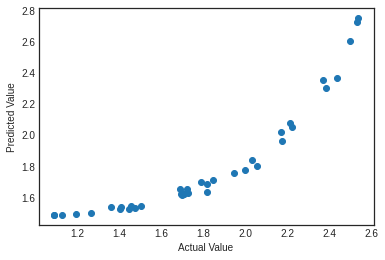

In [89]:
plt.scatter((y_test), (y_pred_ridge1))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

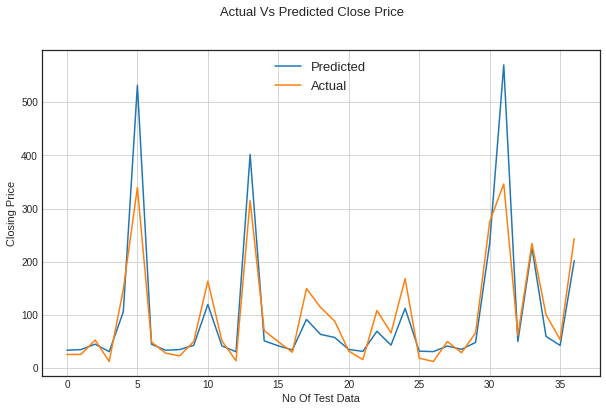

In [90]:
# Actual Vs Predicted Price after validation
plt.figure(figsize=(10,6))
plt.plot(10**(y_pred_ridge1))
plt.plot(10**(np.array(y_test)))
plt.suptitle('Actual Vs Predicted Close Price', fontsize = 13)
plt.legend(['Predicted','Actual'], fontsize = 13)
plt.xlabel('No Of Test Data', fontsize= 11)
plt.ylabel('Closing Price', fontsize= 11)
plt.grid()

In particular, in the fitting of linear or logistic regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods

**Elastic Net**

In [91]:
#fitting data into Elastic Net
elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(X_train,y_train)

In [92]:
#Accuracy of Elastic Net
elastic.score(X_train,y_train)

0.7205302072889175

**Prediction**

In [93]:
y_pred_elastic = elastic.predict(X_test)

**Evaluation Matrices**

In [94]:
# Test Performance of Elastic Net model
print("Mean Squared Error :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("Root Mean Squared Error :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("Mean Absolute Error :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("Mean Absolute Percentage Error :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

Mean Squared Error : 0.0509
Root Mean Squared Error : 0.2256
Mean Absolute Error : 0.182
Mean Absolute Percentage Error : 0.1184
R2 : 0.7141


Text(0, 0.5, 'Predicted Value')

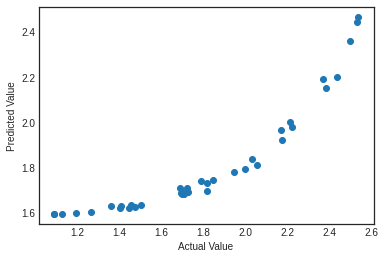

In [95]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

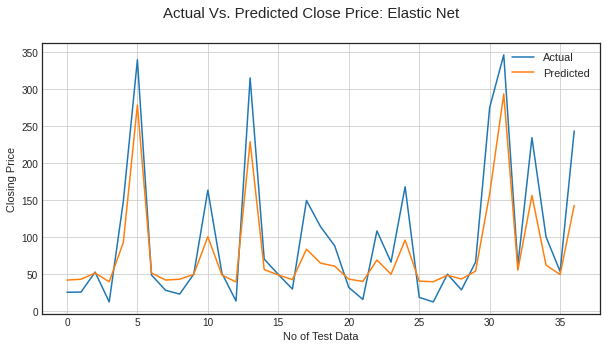

In [96]:
# Actual vs. Predicted Price for Elastic Net
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=11)
plt.xlabel('No of Test Data', fontsize=11)
plt.ylabel('Closing Price', fontsize=11)
plt.grid()

**Cross Validation and Hyperparameter Tuning of Elastic Net**

In [97]:
# Hyper-Parameter Tuning for Elastic Net
elastic = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model= GridSearchCV(elastic,parameters,scoring='neg_mean_squared_error',cv=3)

In [98]:
elastic_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [99]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model.best_params_['alpha'], elastic_model.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.001 1
The negative mean squared error for is:  -0.035


**Prediction**



In [100]:
y_pred_elastic1 = elastic_model.predict(X_test)
y_pred_elastic1

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

**Evaluation Matrices**

In [101]:
# Test Performance after validation
print("Mean Squared Error :",round(mean_squared_error(y_test, y_pred_elastic1), 4))
print("Root Mean Squared Error :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic1)),4))
print("Mean Absolute Error :",round(mean_absolute_error(y_test, y_pred_elastic1),4))
print("Mean Absolute Percentage Error :",round(mean_absolute_percentage_error(y_test, y_pred_elastic1),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic1), 4))

Mean Squared Error : 0.032
Root Mean Squared Error : 0.1789
Mean Absolute Error : 0.1522
Mean Absolute Percentage Error : 0.0961
R2 : 0.8202


Text(0, 0.5, 'Predicted Value')

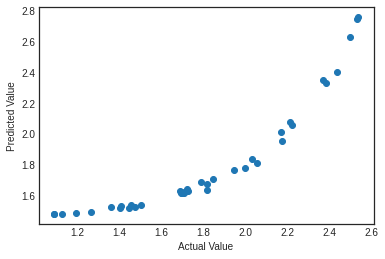

In [102]:
plt.scatter((y_test),(y_pred_elastic1))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

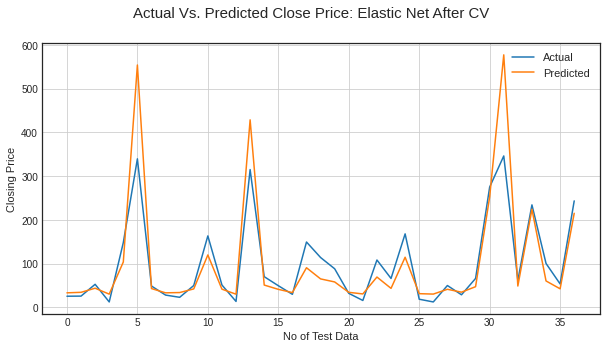

In [103]:
# Actual vs Predicted Price after Validation
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic1))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=11)
plt.xlabel('No of Test Data', fontsize=11)
plt.ylabel('Closing Price', fontsize=11)
plt.grid()

**XG Boost Regressor**

In [104]:
# fitting the data into XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

[19:11:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [105]:
# Accuracy of XGBoost Regressor
xgb.score(X_train,y_train)

0.9989856158912769

**Prediction**

In [108]:
y_pred_XG = xgb.predict(X_test)
y_pred_XG

array([1.3240345, 1.4481571, 1.7491498, 1.1570746, 2.1957493, 2.5145776,
       1.6748834, 1.402919 , 1.4481571, 1.7121533, 2.2350554, 1.7019634,
       1.097817 , 2.5032344, 1.8511137, 1.6865689, 1.443876 , 2.142931 ,
       2.006299 , 1.9523453, 1.4481571, 1.1984308, 2.025753 , 1.7286012,
       2.2308073, 1.2921474, 1.1570746, 1.7182921, 1.4809968, 1.7896991,
       2.4235322, 2.5344093, 1.8577319, 2.3706326, 1.9546288, 1.7555296,
       2.3739333], dtype=float32)

In [107]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

**Evaluation Matrices**

In [109]:
# Test Performance of XGBoost model after validation

print("Mean Squared Error :",round(mean_squared_error(y_test, y_pred_XG), 4))
print("Root Mean Squared Error :",round(math.sqrt(mean_squared_error(y_test, y_pred_XG)),4))
print("Mean Absolute Error :",round(mean_absolute_error(y_test, y_pred_XG),4))
print("Mean Absolute Percentage Error :",round(mean_absolute_percentage_error(y_test, y_pred_XG),4))
print("R2 :",round(r2_score(y_test, y_pred_XG), 4))

Mean Squared Error : 0.0016
Root Mean Squared Error : 0.0394
Mean Absolute Error : 0.0303
Mean Absolute Percentage Error : 0.0196
R2 : 0.9913


Text(0, 0.5, 'Predicted Value')

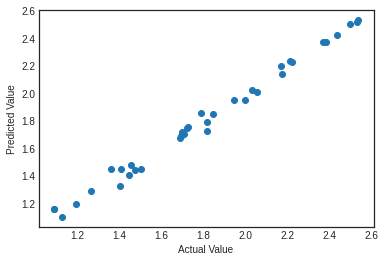

In [110]:
plt.scatter((y_test),(y_pred_XG))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

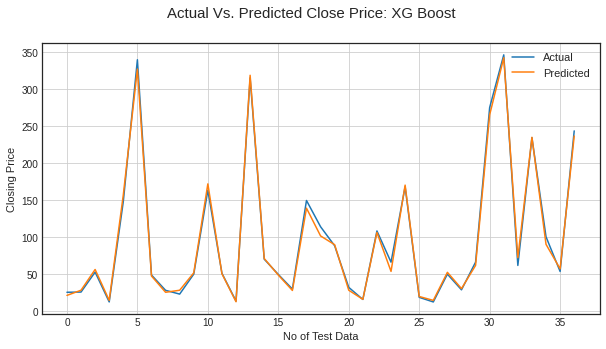

In [111]:
# Actual vs Predicted Price for XGboost after Validation
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_XG))
plt.suptitle('Actual Vs. Predicted Close Price: XG Boost', fontsize=15)
plt.legend(['Actual','Predicted'], fontsize=11)
plt.xlabel('No of Test Data', fontsize=11)
plt.ylabel('Closing Price', fontsize=11)
plt.grid()

**CONCLUSION**

The target variable is highly dependent on input variables

Close, Open and high price of stock are strongly correlated with each other.

This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

In this work we use linear regression technique, lasso regression, ridge regression, elastic net regression and XGBoost Regression technique. these five models gives us the following results

Linear, lasso and ridge regression show almost same R squared values.

Inependent variables ( High, Low and Open ) are directly correlated with Dependent variable ( Closing Price )

Xgboost regression results as best model for yes bank stock closing price data with very less mean square error i.e. 0.0016